# **Course Name: Data Science Engineering Methods and Tools**

### Submitted by -
* Name - Nikita Gaurihar
* Nuid - 002980962
___________________________________________________________________________
 
## **Assignment 2** - Kaggle Competition


### **Abstract** "*Mobile Price Range Prediction IS2020 V2*"
With the rapidly changing technologies, electronic devices like cell phones, laptops, ipad, etc. are getting more and more advanced and feature-packed. Users are changing their devices very frequently and sometimes every year in case of Cell phones. Thus, it becomes paramount for mobile companies to identify features that customers values the most.In this project, we aim to predict the mobile prices based on its specifications like ram, battery power, screen resolution, internal memory, etc.   


### **Variables information**

0   id   - unique identifier          
 1   battery_power - battery power of cell phone
 2   bluetooth - whether it has a bluetooth or not   
 3   clock_speed - clock speed   
 4   dual_sim - if it is a dual sim or not.        
 5   fc                
 6   four_g - If it is a 4G device or not           
 7   int_memory - Internal memory of the device    
 8   m_dep - mobile depth       
 9   mobile_wt - mobile weight       
 10  n_cores - no of core processors       
 11  pc -              
 12  px_height- pixel height
 13  px_width - pixel weight      
 14  ram - ram         
 15  sc_h -          
 16  sc_w           
 17  talk_time - how much talktime does it support        
 18  three_g - if its a 3G phone        
 19  touch_screen - If its a touchscreen phone
 20  wifi - does it support wifi or not           
 21  price_range - Price range of device.  





---------------------------------------------------------------------------

## **Part A: Downloading Kaggle competition Dataset:**

In [ ]:
from google.colab import files

uploaded = files.upload()



for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

      name=fn, length=len(uploaded[fn])))

  

# Then move kaggle.json into the folder where the API expects to find it.

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle competitions download -c mobile-price-range-prediction-is2020-v2

  0% 0.00/4.12k [00:00<?, ?B/s]
100% 4.12k/4.12k [00:00<00:00, 3.62MB/s]
  0% 0.00/37.7k [00:00<?, ?B/s]
100% 37.7k/37.7k [00:00<00:00, 34.1MB/s]
  0% 0.00/89.5k [00:00<?, ?B/s]
100% 89.5k/89.5k [00:00<00:00, 48.0MB/s]


# **Part B**: 

### **1. Importing Packages and libraries:**

In [ ]:
import numpy as np                                                   # linear algebra
import pandas as pd                                                  # data processing
import seaborn as sns                                                # Python Visualization library to draw attactive statistical graphics
import matplotlib.pyplot as plt                                      # Python 2D plotting library
import scipy.stats as stats                                          # 

import warnings
warnings.filterwarnings('ignore')

# scikit learn is an open source Python library to implement a range of machine learning, pre-processing, cross validation & Visualizations
from sklearn.preprocessing import OneHotEncoder                       # 
from sklearn.model_selection import train_test_split                  # to split data in train & test sets.
from sklearn.ensemble import RandomForestRegressor                    #

# **Part B:**
### **2. Displaying given dataset:**

In [ ]:
train_data = pd.read_csv('train_data.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   int64  
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [ ]:
train_data.head(5)

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,4,0,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,2,2,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,7,19,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,1,16,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,7,13,1442,1904,1958,7,5,2,1,0,0,2


## **Part B- 3. Addition of New Feature:**

In [ ]:
for ind, row in train_data.iterrows():
  train_data.loc[ind,"Disp_Resolution"] = row['px_height']*row['px_width']

In [ ]:
train_data

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Disp_Resolution
0,1,807,1,0.5,1,0,0,37,0.2,127,4,0,245,829,2319,5,4,4,0,0,0,1,203105.0
1,2,1065,1,0.5,0,0,1,14,0.7,89,2,2,188,928,3078,10,1,18,1,0,1,2,174464.0
2,3,1171,1,1.7,1,2,0,19,0.3,167,7,19,248,755,263,6,5,8,0,0,0,0,187240.0
3,4,609,1,3.0,0,15,1,44,0.3,117,1,16,58,1253,2581,15,11,15,1,0,1,1,72674.0
4,5,1193,1,2.3,0,7,0,20,1.0,158,7,13,1442,1904,1958,7,5,2,1,0,0,2,2745568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,8,14,919,1344,757,12,2,16,1,1,1,0,1235136.0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,7,0,1485,1655,3406,5,1,11,0,0,1,3,2457675.0
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,7,20,707,1199,3625,17,1,12,0,1,1,3,847693.0
1398,1399,703,1,2.7,0,12,1,30,0.3,113,1,20,218,1065,1472,14,7,7,1,0,0,0,232170.0


In [ ]:
test_data = pd.read_csv('test_data.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   battery_power  600 non-null    int64  
 2   bluetooth      600 non-null    int64  
 3   clock_speed    600 non-null    float64
 4   dual_sim       600 non-null    int64  
 5   fc             600 non-null    int64  
 6   four_g         600 non-null    int64  
 7   int_memory     600 non-null    int64  
 8   m_dep          600 non-null    float64
 9   mobile_wt      600 non-null    int64  
 10  n_cores        600 non-null    int64  
 11  pc             600 non-null    int64  
 12  px_height      600 non-null    int64  
 13  px_width       600 non-null    int64  
 14  ram            600 non-null    int64  
 15  sc_h           600 non-null    int64  
 16  sc_w           600 non-null    int64  
 17  talk_time      600 non-null    int64  
 18  three_g   

In [ ]:
test_data.head(5)

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1401,1572,1,0.8,1,7,1,8,0.8,169,5,8,577,1237,3461,6,3,10,1,1,1
1,1402,707,0,2.1,1,2,0,25,0.8,131,3,17,495,574,3838,9,2,7,1,0,1
2,1403,983,0,0.6,1,0,1,45,0.1,130,4,11,948,1205,2052,5,3,6,1,0,1
3,1404,827,1,0.6,1,9,1,35,0.2,87,6,17,23,826,2367,5,3,15,1,0,1
4,1405,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1


In [ ]:
for ind, row in test_data.iterrows():
  test_data.loc[ind,"Disp_Resolution"] = row['px_height']*row['px_width']

In [ ]:
test_data

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Disp_Resolution
0,1401,1572,1,0.8,1,7,1,8,0.8,169,5,8,577,1237,3461,6,3,10,1,1,1,713749.0
1,1402,707,0,2.1,1,2,0,25,0.8,131,3,17,495,574,3838,9,2,7,1,0,1,284130.0
2,1403,983,0,0.6,1,0,1,45,0.1,130,4,11,948,1205,2052,5,3,6,1,0,1,1142340.0
3,1404,827,1,0.6,1,9,1,35,0.2,87,6,17,23,826,2367,5,3,15,1,0,1,18998.0
4,1405,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1,1245425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1996,707,0,0.5,0,0,1,16,0.1,194,2,0,1027,1508,1853,17,14,12,1,1,1,1548716.0
596,1997,888,0,2.6,1,2,1,33,0.4,198,2,17,327,1683,3407,12,1,20,1,0,0,550341.0
597,1998,1130,0,1.8,1,0,0,27,0.9,101,1,8,1495,1579,315,14,5,11,1,1,0,2360605.0
598,1999,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1,1168178.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               600 non-null    int64  
 1   battery_power    600 non-null    int64  
 2   bluetooth        600 non-null    int64  
 3   clock_speed      600 non-null    float64
 4   dual_sim         600 non-null    int64  
 5   fc               600 non-null    int64  
 6   four_g           600 non-null    int64  
 7   int_memory       600 non-null    int64  
 8   m_dep            600 non-null    float64
 9   mobile_wt        600 non-null    int64  
 10  n_cores          600 non-null    int64  
 11  pc               600 non-null    int64  
 12  px_height        600 non-null    int64  
 13  px_width         600 non-null    int64  
 14  ram              600 non-null    int64  
 15  sc_h             600 non-null    int64  
 16  sc_w             600 non-null    int64  
 17  talk_time       

In [ ]:
sample_submission_data = pd.read_csv('sample_submission.csv')

In [ ]:
sample_submission_data.head(5)

,id,price_range
0,1401,0
1,1402,2
2,1403,1
3,1404,1
4,1405,3


In [ ]:
y_true = sample_submission_data['price_range']
y_true

0      0
1      2
2      1
3      1
4      3
      ..
595    0
596    1
597    3
598    0
599    3
Name: price_range, Length: 600, dtype: int64

In [ ]:
y_true.unique()


array([0, 2, 1, 3])


### **Part C: Train & test split**

**1. Splitting the dataset in train & test data:**

In [ ]:
x_train = train_data.drop(columns=['price_range','id'])                                      # id is unique & price-range is target variable
y_train = train_data['price_range']                                                          # price-range is target variable

In [ ]:
x_test = test_data.drop(columns=['id'])                                                        # id is unique


In [ ]:
x_test

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Disp_Resolution
0,1572,1,0.8,1,7,1,8,0.8,169,5,8,577,1237,3461,6,3,10,1,1,1,713749.0
1,707,0,2.1,1,2,0,25,0.8,131,3,17,495,574,3838,9,2,7,1,0,1,284130.0
2,983,0,0.6,1,0,1,45,0.1,130,4,11,948,1205,2052,5,3,6,1,0,1,1142340.0
3,827,1,0.6,1,9,1,35,0.2,87,6,17,23,826,2367,5,3,15,1,0,1,18998.0
4,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1,1245425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,707,0,0.5,0,0,1,16,0.1,194,2,0,1027,1508,1853,17,14,12,1,1,1,1548716.0
596,888,0,2.6,1,2,1,33,0.4,198,2,17,327,1683,3407,12,1,20,1,0,0,550341.0
597,1130,0,1.8,1,0,0,27,0.9,101,1,8,1495,1579,315,14,5,11,1,1,0,2360605.0
598,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1,1168178.0


In [ ]:
train_data['price_range'].unique()

array([1, 2, 0, 3])

In [ ]:
y_train.value_counts()

3    350
2    350
1    350
0    350
Name: price_range, dtype: int64

* ## **Interpretation**: This is a case of multiclass classification with balanced dataset.

## **Part c- 2. Feature Importance:**

[0.05674097 0.02014341 0.03443262 0.01991932 0.03002997 0.0171915
 0.03626077 0.03428153 0.03525483 0.03296405 0.03295379 0.03997182
 0.04415222 0.3651625  0.03540438 0.03364681 0.03655568 0.01448013
 0.01679216 0.02133416 0.04232738]


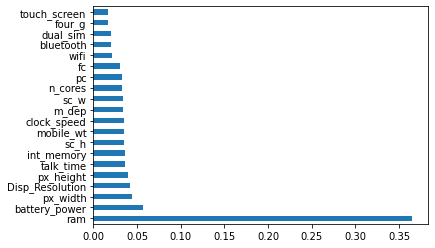

In [ ]:
import pandas as pd
import numpy as np


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

amodel = ExtraTreesClassifier()
amodel.fit(x_train,y_train)
print(amodel.feature_importances_)                                              #use inbuilt class feature_importances of tree based classifiers
                                                                                #plot graph of feature importances for better visualization
feat_importances = pd.Series(amodel.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

* **Interpretation:** The most important features contributing to predict mobile price are ram, battery_power, px_width, Disp_Resolution, px_height and int_memory


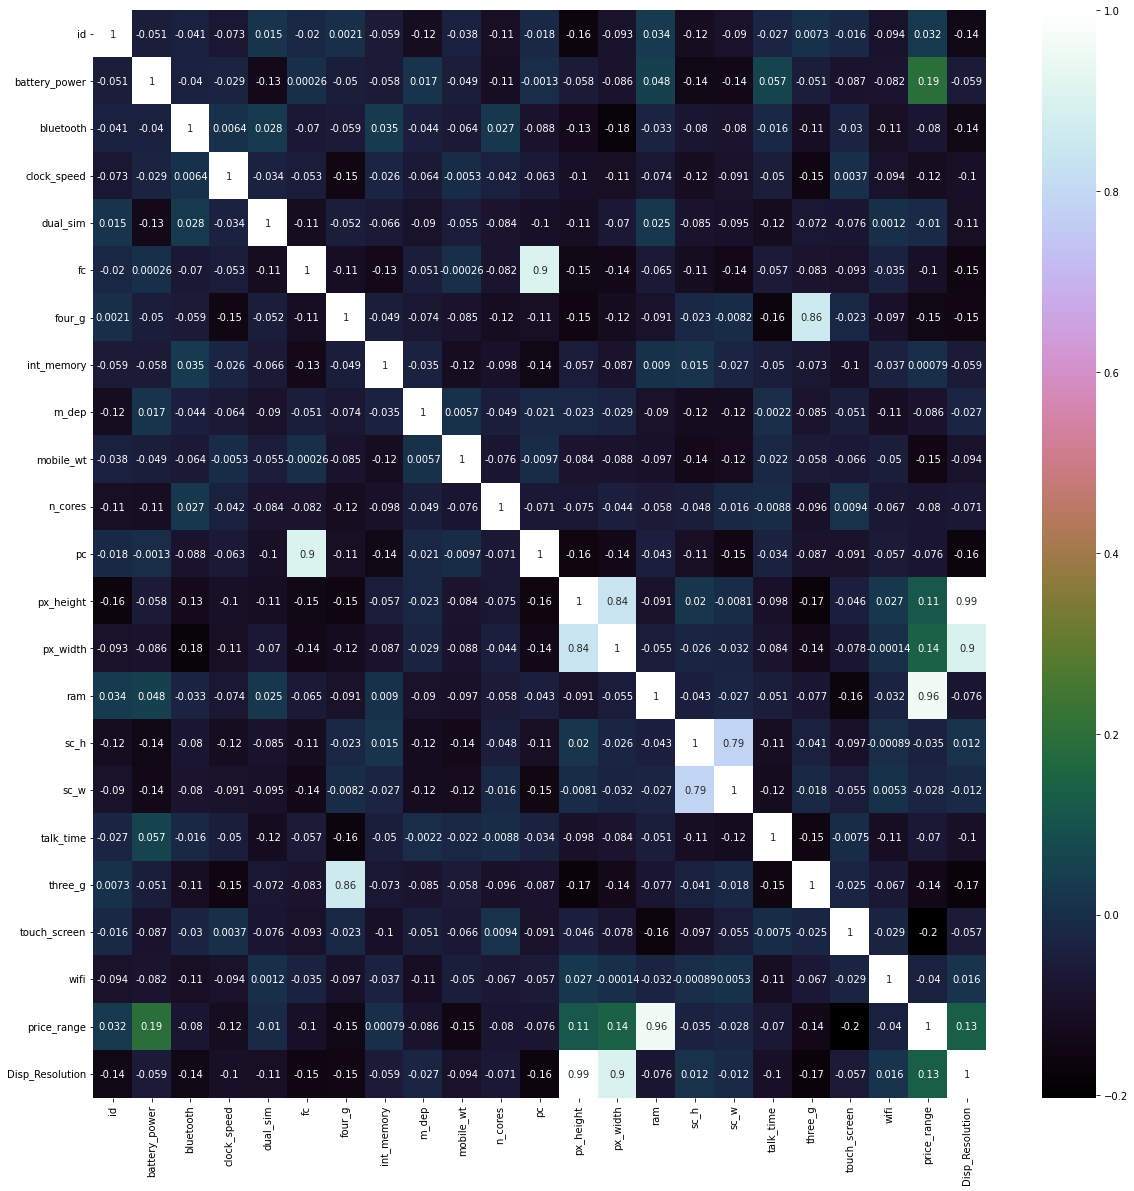

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

combined = [train_data,test_data] 
dataset = pd.concat(combined, sort=False)

aa = dataset.corr(method='pearson')
#get correlations of each features in dataset

top_corr_features = aa.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(aa[top_corr_features].corr(),annot=True,cmap="cubehelix")

* **Interpretation:**
* Heatmap provides us with a visual depiction of the relationship between the variables.

* The correlation coefficient has values between -1 to 1:

1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies stronger negative correlation

We will only select features which has the highest correlation with respect to target variable having p-value <= 0.05

Hence, variables satisfying above condition are ram, px_height, px_width, Disp_Resolution and battery power.

To predict a mobile-price range, these are the most significant factors and are independent of each other. 



## **Part c- 3. Feature Selection:**

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm
import pandas as pd

In [ ]:
result = sm.OLS(train_data['price_range']  , train_data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc','four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution']]).fit()

result = sm.OLS(train_data['price_range']  , x_trainscale[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc','four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution']]).fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1760.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        05:11:46   Log-Likelihood:                         -535.92
No. Observations:                1400   AIC:                                      1114.
Df Residuals:                    1379   BIC:                                      1224.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
battery_power       0.0004   2.09e-05     19.378      0.000       0.000       0.000
bluetooth          -0.0454      0.019     -2.371      0.018      -0.083      -0.008
clock_speed        -0.0482      0.011     -4.229      0.000      -0.071      -0.026
dual_sim           -0.0524      0.019     -2.731      0.006      -0.090      -0.015
fc                 -0.0017      0.003     -0.593      0.554      -0.008       0.004
four_g              0.0035      0.024      0.146      0.884      -0.043       0.050
int_memory         -0.0009      0.001     -1.814      0.070      -0.002    7.61e-05
m_dep              -0.0800      0.033     -2.444      0.015      -0.144      -0.016
mobile_wt          -0.0029      0.000    -11.639      0.000      -0.003      -0.002
n_cores            -0.0126      0.004     -3.039      0.002      -0.021      -0.004
pc                 -0.0022      0.002     -1.047      0.295      -0.006       0.002
px_height          -0.0004   8.26e-05     -5.370      0.000      -0.001      -0.000
px_width        -7.203e-05   3.41e-05     -2.114      0.035      -0.000   -5.18e-06
ram                 0.0009   8.68e-06    105.531      0.000       0.001       0.001
sc_h               -0.0103      0.003     -3.955      0.000      -0.015      -0.005
sc_w               -0.0003      0.003     -0.118      0.906      -0.005       0.005
talk_time          -0.0069      0.002     -4.082      0.000      -0.010      -0.004
three_g            -0.0566      0.027     -2.068      0.039      -0.110      -0.003
touch_screen       -0.0375      0.019     -1.960      0.050      -0.075    2.79e-05
wifi               -0.0570      0.019     -2.977      0.003      -0.095      -0.019
Disp_Resolution  4.708e-07   5.16e-08      9.117      0.000     3.7e-07    5.72e-07
==============================================================================
Omnibus:                       20.168   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.345
Skew:                           0.038   Prob(JB):                      0.00209
Kurtosis:                       2.546   Cond. No.                     4.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation:**

* The variables having p-value less than 0.05 are not significant variables. Hence, we will remove variables namely - fc, four_g, int_memory, pc and sc_w.

* Again running the OLS algorithm.

In [ ]:
result_significant = sm.OLS(train_data['price_range'], train_data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution']]).fit()
result_significant.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              2306.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        05:11:47   Log-Likelihood:                         -539.51
No. Observations:                1400   AIC:                                      1111.
Df Residuals:                    1384   BIC:                                      1195.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
battery_power       0.0004   2.07e-05     19.199      0.000       0.000       0.000
bluetooth          -0.0472      0.019     -2.470      0.014      -0.085      -0.010
clock_speed        -0.0496      0.011     -4.358      0.000      -0.072      -0.027
dual_sim           -0.0525      0.019     -2.739      0.006      -0.090      -0.015
m_dep              -0.0844      0.033     -2.583      0.010      -0.148      -0.020
mobile_wt          -0.0029      0.000    -11.866      0.000      -0.003      -0.002
n_cores            -0.0129      0.004     -3.136      0.002      -0.021      -0.005
px_height          -0.0005    8.2e-05     -5.725      0.000      -0.001      -0.000
px_width         -8.54e-05   3.37e-05     -2.533      0.011      -0.000   -1.93e-05
ram                 0.0009   8.63e-06    105.811      0.000       0.001       0.001
sc_h               -0.0111      0.002     -5.122      0.000      -0.015      -0.007
talk_time          -0.0071      0.002     -4.206      0.000      -0.010      -0.004
three_g            -0.0574      0.022     -2.611      0.009      -0.100      -0.014
touch_screen       -0.0383      0.019     -2.000      0.046      -0.076      -0.001
wifi               -0.0586      0.019     -3.059      0.002      -0.096      -0.021
Disp_Resolution  4.888e-07   5.12e-08      9.549      0.000    3.88e-07    5.89e-07
==============================================================================
Omnibus:                       19.983   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.186
Skew:                           0.030   Prob(JB):                      0.00226
Kurtosis:                       2.547   Cond. No.                     4.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Interpretation**: 

Significant Variables useful to predict the correct price range for the mobile device are - 'battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution'

## **Part C:** 
**3. Checking for missing values:**



In [ ]:
x_train.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
Disp_Resolution    0
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
x_test.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
Disp_Resolution    0
dtype: int64

* ### **Interpretation**: There is no missing value in the dataset

## **Part C - 4. Standardising the dataset**

* Standardistion is a part of data preprocessing. 
* Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.
* Standardises features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

                                z = (x - u) / s

      where, u = mean of the training samples or zero if with_mean=False, and 
             s = standard deviation of the training samples or one if with_std=False.

* The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the standardisation operation on an array-like dataset.

In [ ]:
x_trainscale = train_data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution']]
x_testscale = test_data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'Disp_Resolution']]

In [ ]:
# sklearn.preprocessing is the package that provides several common utility functions and transformer classes to perform standardization of the dataset.
# StandardScaler is utility class of preprocessing package that transforms the data in such a manner that it has mean as 0 and standard deviation as 1.

from sklearn.preprocessing import StandardScaler as ss                                               
x_trainscale = ss().fit_transform(x_train)
x_testscale = ss().fit_transform(x_test)

In [ ]:
pd.DataFrame(x_trainscale).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.976452,1.00143,-1.245224,0.988636,-0.991789,-1.031938,0.266596,-1.052203,-0.371322,-0.247588,-1.624363,-0.911125,-0.971849,0.180472,-1.753980,-0.408538,-1.257549,-1.762263,-1.007169,-1.024588,-0.849033
1,-0.390618,1.00143,-1.245224,-1.011495,-0.991789,0.969050,-0.996928,0.671913,-1.446330,-1.125115,-1.293608,-1.038609,-0.740549,0.878873,-0.551683,-1.094333,1.267598,0.567452,-1.007169,0.976002,-0.883491
2,-0.149926,1.00143,0.211077,0.988636,-0.521189,-1.031938,-0.722249,-0.707380,0.760265,1.068703,1.517813,-0.904415,-1.144740,-1.711378,-1.513521,-0.179940,-0.536078,-1.762263,-1.007169,-1.024588,-0.868120
3,-1.426045,1.00143,1.788737,-1.011495,2.537708,0.969050,0.651147,-0.707380,-0.654219,-1.563879,1.021680,-1.329363,0.018769,0.421554,0.650615,1.191650,0.726495,0.567452,-1.007169,0.976002,-1.005951
4,-0.099971,1.00143,0.939228,-1.011495,0.655310,-1.031938,-0.667313,1.706382,0.505658,1.068703,0.525547,1.766046,1.539742,-0.151706,-1.273061,-0.179940,-1.618284,0.567452,-1.007169,-1.024588,2.209737


In [ ]:
pd.DataFrame(x_testscale).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.755609,1.030464,-0.895860,0.963982,0.544438,0.932287,-1.323327,1.077011,0.802068,0.252581,-0.350597,-0.117567,-0.067554,1.235946,-1.461599,-0.631110,-0.209202,0.541390,0.996672,1.010051,-0.221881
1,-1.224992,-0.970437,0.736782,0.963982,-0.557663,-1.072631,-0.378557,1.077011,-0.268734,-0.615891,1.126176,-0.306049,-1.570691,1.585326,-0.769445,-0.863136,-0.778888,0.541390,-1.003339,1.010051,-0.742231
2,-0.593032,-0.970437,-1.147036,0.963982,-0.998504,0.932287,0.732938,-1.385398,-0.296913,-0.181655,0.141661,0.735196,-0.140104,-0.069828,-1.692317,-0.631110,-0.968783,0.541390,-1.003339,1.010051,0.297224
3,-0.950227,1.030464,-1.147036,0.963982,0.985279,0.932287,0.177191,-1.033625,-1.508609,0.686816,1.126176,-1.390966,-0.999363,0.222094,-1.692317,-0.631110,0.740276,0.541390,-1.003339,1.010051,-1.063357
4,1.678363,1.030464,0.485607,0.963982,-0.557663,-1.072631,-0.045108,1.428783,0.294846,-1.484363,1.126176,0.337546,0.771301,0.829108,0.153428,-0.167059,1.499858,-1.847096,-1.003339,1.010051,0.422080


## **Part C - 5. Interpretability & Reports:**

In [ ]:
!pip install plotly

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 37.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509235 sha256=5b22fad2039b4c52a188a90c4d776849f7fc45cb2ac6f46638fccca976b1e008
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
!pip install numba

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt
import shap

In [ ]:
# Implementing Random Forest Regressor:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

# Fit the model
model.fit(x_trainscale, y_train)  
print(model.feature_importances_)

[4.51453352e-02 2.14139838e-04 6.90632382e-04 0.00000000e+00
 7.31647569e-04 2.77480262e-04 1.42041360e-03 1.50104887e-03
 2.03017249e-03 6.81142823e-04 1.02740248e-03 6.87284171e-03
 1.95547388e-02 8.90755621e-01 2.24755553e-04 1.14352817e-03
 1.21921310e-03 2.74037935e-04 0.00000000e+00 1.77623301e-04
 2.60582248e-02]


# Variable Importance Plot — Global Interpretability

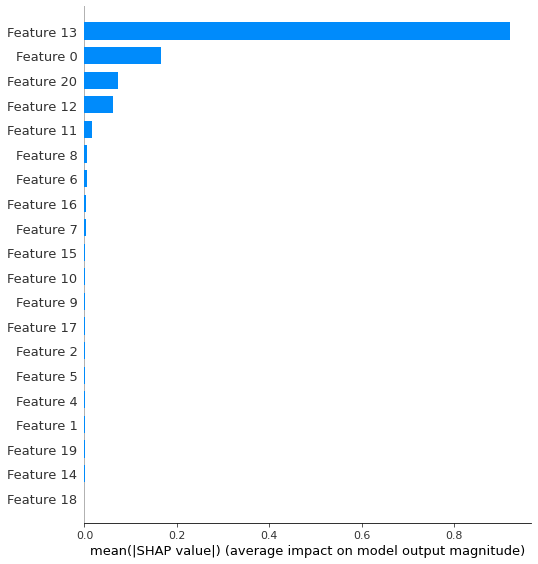

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(x_trainscale)
shap.summary_plot(shap_values, x_trainscale, plot_type="bar")

* **Interpretation**: 



The details of the variables are - 

Feature 0 = battery_power 

Feature 1 = bluetooth 

Feature 2 = clock_speed 

Feature 3 = dual_sim  

Feature 4 = fc 

Feature 5 = four_g 

Feature 6 = int_memory 

Feature 7 = m_dep   

Feature 8 = mobile_wt  

Feature 9 = n_cores    

Feature 10 = pc     

Feature 11 = px_height 

Feature 12 = px_width  

Feature 13 = ram

Feature 14 = sc_h  

Feature 15 = sc_w     

Feature 16 = talk_time  

Feature 17 = three_g   

Feature 18 = touch_screen 
   
Feature 19 = wifi     

Feature 20 - Disp_Resolution


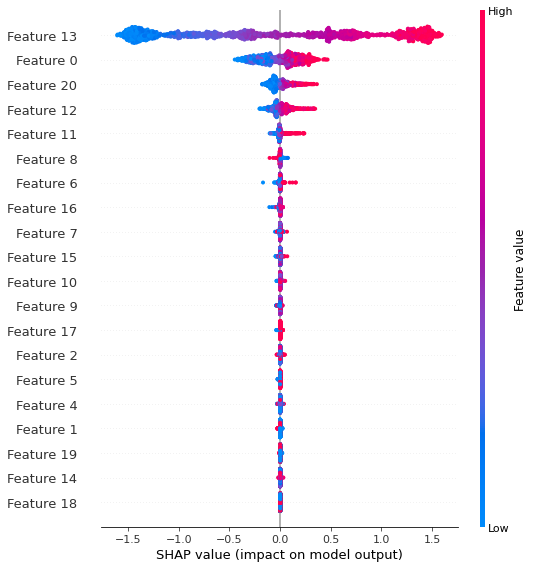

In [ ]:
shap.summary_plot(shap_values, x_trainscale)

* **Interpretation**: 
We can describe a predictive model that predicts mobile price range as associated with the following characteristics:

High "ram" value

High "battery power"

High "Display resolution"

High "px_width"

High "px_height"

Low "mobile_wt"

High "int_memory"

High "Talktime"



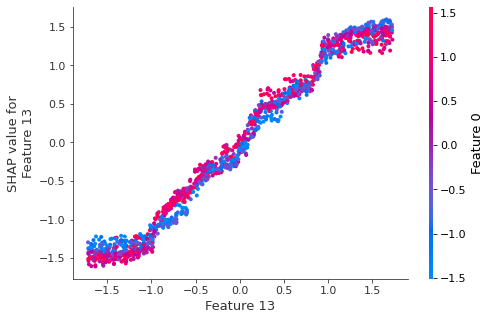

In [ ]:
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("Feature 13", shap_values, x_trainscale)

* **Interpretation:** 
The function automatically includes another variable that your chosen variable interacts most with. The above plot shows there is an approximately linear and positive trend between “Feature 13” i.e, "ram" and the target variable, and "ram" interacts with “battery_power” frequently.

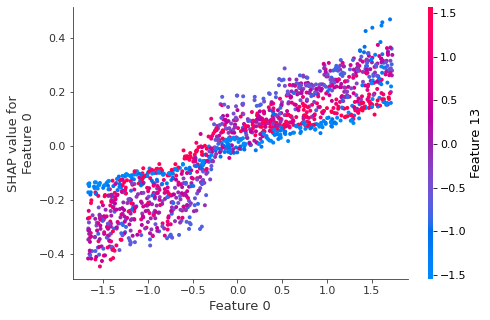

In [ ]:
shap.dependence_plot("Feature 0", shap_values, x_trainscale)

*  **Interpretation:**

Again, The above plot shows there is an approximately linear and positive trend between “Feature 0” i.e, "battery power" and the target variable, and“battery_power” interacts with "ram" frequently.

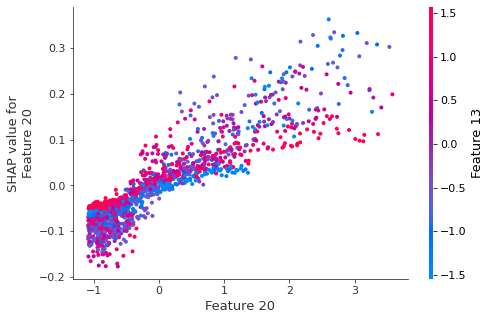

In [ ]:
shap.dependence_plot("Feature 20", shap_values, x_trainscale)

* **Interpretation:**
Again, The above plot shows there is an approximately linear and positive trend between “Feature 20” i.e, "Disp_Resolution" and the target variable, Disp_Resolution interacts with "ram" frequently.

# **Part D- Predictive Modeling** 

## **1. Random forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import validation_curve
from sklearn import metrics

r = rfc().fit(x_trainscale,y_train)
y_pred = r.predict(x_testscale)
v = cvs(rfc(), x_trainscale, y_train, cv=3)

In [ ]:
res = pd.DataFrame({'id':test_data['id'],'price_range':y_pred})
res.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_rfc.csv',index=False)

In [ ]:
print(v)

[0.8372591  0.85438972 0.86909871]


In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, y_pred, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, labels=[0, 2, 1, 3]))

[[34 41 46 42]
 [30 32 36 40]
 [37 32 31 29]
 [46 38 44 42]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       163
           2       0.22      0.23      0.23       138
           1       0.20      0.24      0.22       129
           3       0.27      0.25      0.26       170

    accuracy                           0.23       600
   macro avg       0.23      0.23      0.23       600
weighted avg       0.23      0.23      0.23       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.23166666666666666

## **Optimisation using hyperparameter tuning**

**n_estimators** = number of trees in the forest

**max_features** = max number of features considered for splitting a node

**max_depth** = max number of levels in each decision tree

**min_samples_split** = min number of data points placed in a node before the node is split

**min_samples_leaf** = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
# random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# pprint(random_grid)
# {'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf_model = RandomForestClassifier(random_state=1)
# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

In [ ]:
# train the grid search meta-estimator to find the best model
# Fit the random search model
model = clf.fit(x_trainscale, y_train)

In [ ]:
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.75,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import warnings
warnings.filterwarnings("ignore")
print(model.best_params_)
print(model.best_score_)

{'max_features': 0.75, 'min_samples_split': 6, 'n_estimators': 50}
0.8985714285714286


In [ ]:
optimised_r = rfc(max_features= 0.75, 
                  min_samples_split = 6,
                  n_estimators = 50)
optimised_model = optimised_r.fit(x_trainscale,y_train)
y_pred_orfc = optimised_r.predict(x_testscale)
vv = cvs(optimised_r, x_trainscale, y_train, cv=3)

In [ ]:
print(vv)

[0.89721627 0.90364026 0.88197425]


In [ ]:
new_predictions = optimised_model.predict(x_testscale)
print(new_predictions)

[3 3 1 1 3 3 0 0 2 3 1 1 0 1 0 1 3 1 3 2 3 2 2 0 3 2 1 3 2 3 2 3 0 1 1 2 2
 2 1 2 3 1 2 3 0 2 2 3 2 3 1 0 0 3 0 2 1 1 2 3 3 1 1 3 2 2 2 2 0 0 0 0 0 3
 3 0 2 1 0 2 1 2 1 3 0 2 0 1 3 2 1 2 0 3 3 3 3 3 0 0 1 0 1 1 1 3 1 3 3 2 1
 1 0 2 1 2 1 0 3 1 2 1 1 0 1 1 1 3 0 0 3 2 0 0 0 0 1 2 1 2 2 0 2 0 3 3 0 3
 2 0 3 1 2 3 2 1 0 3 1 2 3 1 1 3 0 0 3 1 0 2 3 2 0 1 2 2 0 1 1 1 2 0 1 3 2
 2 0 3 3 1 0 2 2 0 3 2 0 1 3 3 0 1 1 2 3 0 2 3 0 2 3 0 2 3 1 2 3 1 2 2 3 0
 2 2 2 1 2 3 0 3 1 0 2 3 3 1 3 0 1 3 2 2 0 1 2 0 1 2 3 0 3 0 2 0 2 3 3 1 1
 3 1 0 2 0 3 2 2 2 1 3 1 3 3 1 0 3 0 3 1 2 3 2 1 3 3 1 1 2 2 2 1 1 1 2 1 1
 2 0 0 0 2 3 1 3 1 2 3 0 1 3 0 0 0 3 1 1 2 1 2 0 2 1 1 1 1 0 1 1 3 3 2 0 2
 0 3 0 3 0 3 1 1 3 3 2 2 0 3 1 1 2 0 1 1 3 1 0 0 3 2 3 3 0 2 2 0 0 3 3 2 2
 3 3 3 3 3 2 1 0 3 1 0 0 3 0 0 0 2 1 3 0 3 1 1 1 2 0 1 1 1 1 2 0 1 1 0 0 0
 2 0 1 2 1 2 3 3 3 2 2 2 0 1 1 1 2 0 2 0 0 2 0 0 0 0 2 1 3 2 1 0 2 0 2 2 1
 2 2 1 1 0 3 1 3 3 3 1 0 3 0 1 2 0 1 0 3 3 0 0 0 1 0 0 0 0 2 0 1 1 2 0 3 2
 1 0 1 3 3 1 1 1 2 3 1 0 

In [ ]:
optimised_output = pd.DataFrame({'id':test_data['id'],'price_range':new_predictions})
optimised_output.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_rfc22.csv',index=False)

In [ ]:
# Importing the dependancies
from sklearn import metrics

In [ ]:
# Predicted values
new_predictions

array([3, 3, 1, 1, 3, 3, 0, 0, 2, 3, 1, 1, 0, 1, 0, 1, 3, 1, 3, 2, 3, 2,
       2, 0, 3, 2, 1, 3, 2, 3, 2, 3, 0, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2, 3,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 1, 0, 2, 1, 2, 1, 3, 0, 2, 0, 1,
       3, 2, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 3, 3, 2,
       1, 1, 0, 2, 1, 2, 1, 0, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 1, 2, 3,
       2, 1, 0, 3, 1, 2, 3, 1, 1, 3, 0, 0, 3, 1, 0, 2, 3, 2, 0, 1, 2, 2,
       0, 1, 1, 1, 2, 0, 1, 3, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 3, 2, 0, 1,
       3, 3, 0, 1, 1, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 3, 0, 3, 1, 0, 2, 3, 3, 1, 3, 0, 1, 3, 2, 2,
       0, 1, 2, 0, 1, 2, 3, 0, 3, 0, 2, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2, 0,
       3, 2, 2, 2, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 1, 2, 3, 2, 1, 3, 3, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2,

In [ ]:
# Actual values
y_true

0      0
1      2
2      1
3      1
4      3
      ..
595    0
596    1
597    3
598    0
599    3
Name: price_range, Length: 600, dtype: int64

In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, new_predictions, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, new_predictions, labels=[0, 2, 1, 3]))

[[35 43 47 38]
 [32 34 34 38]
 [37 31 31 30]
 [47 36 44 43]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       163
           2       0.24      0.25      0.24       138
           1       0.20      0.24      0.22       129
           3       0.29      0.25      0.27       170

    accuracy                           0.24       600
   macro avg       0.24      0.24      0.24       600
weighted avg       0.24      0.24      0.24       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, new_predictions)

0.23833333333333334

## **Interpretation**: 
- Random forest classifier predicted the mobile price ranges with accuracy of "0.2316" and of "0.2383" post optimisation using hyperparameter tuning using Grid search.
- Kaggle score went from "0.88" to "0.925"

## **2. Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score as cvs



In [ ]:
logreg = lr().fit(x_trainscale,y_train)
mmm = logreg.fit(x_trainscale,y_train)
y_pred_lr = mmm.predict(x_testscale)
a = cvs(lr(),x_trainscale,y_train, cv=3)
print(a) 

[0.94004283 0.94860814 0.92274678]


In [ ]:
lr_pred = pd.DataFrame({'id':test_data['id'],'price_range':y_pred_lr})
lr_pred.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_lr1.csv',index=False)

In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, y_pred_lr, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred_lr, labels=[0, 2, 1, 3]))

[[35 38 46 44]
 [31 37 32 38]
 [37 34 31 27]
 [46 36 43 45]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       163
           2       0.26      0.27      0.26       138
           1       0.20      0.24      0.22       129
           3       0.29      0.26      0.28       170

    accuracy                           0.25       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.25      0.25      0.25       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_lr)

0.24666666666666667

## Optimisation using Hyperparameter tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV                               # grid search
gscx = {'C':np.logspace(-3,3,7),'penalty':['l1','l2']}

In [ ]:
gscv = GridSearchCV(lr(),gscx).fit(x_trainscale,y_train)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 100.0, 'penalty': 'l2'}
0.9635714285714286


In [ ]:
reg = lr(C=1000,penalty='l2').fit(x_trainscale,y_train)
#m = reg.fit(x_trainscale,y_train)
y_pred_olr=reg.predict(x_testscale)
value = cvs(reg,x_trainscale,y_train,cv=3) 

print(value)

zz = pd.DataFrame({'id':test_data['id'],'price_range':y_pred_olr})
zz.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_lr.csv',index=False)

[0.95717345 0.95289079 0.95922747]


In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, y_pred_olr, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred_olr, labels=[0, 2, 1, 3]))

[[35 41 45 42]
 [31 40 31 36]
 [37 35 30 27]
 [46 39 43 42]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       163
           2       0.26      0.29      0.27       138
           1       0.20      0.23      0.22       129
           3       0.29      0.25      0.26       170

    accuracy                           0.24       600
   macro avg       0.25      0.25      0.24       600
weighted avg       0.25      0.24      0.25       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_olr)

0.245

## **Interpretation**: 
- Logitic Regression algorith was used to predict the mobile price ranges with accuracy of "0.2466" and of "0.245" post optimisation using hyperparameter tuning using Grid search.
- Kaggle score went from "0.96" to "0.98"

## **3. Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier()

dtc = decision_tree.fit(x_trainscale,y_train)

scor = cross_val_score(decision_tree,x_trainscale,y_train,cv=5)

print(scor)

#print(scores.mean())

[0.84285714 0.76785714 0.79285714 0.83214286 0.825     ]


In [ ]:
price_pred_dtc = dtc.predict(x_testscale)
print(price_pred_dtc)

[3 3 1 1 3 3 0 0 2 3 1 0 0 1 0 1 2 1 3 2 3 2 2 0 3 2 2 3 3 3 3 3 0 1 2 2 2
 2 1 2 3 2 2 3 0 1 2 3 2 2 1 0 0 2 0 3 0 2 2 3 3 1 1 3 2 2 2 2 0 0 0 0 0 3
 3 0 1 1 0 2 1 2 1 3 0 2 0 1 3 2 1 2 0 3 2 3 3 3 0 0 1 0 2 1 0 3 1 3 3 2 1
 1 0 2 1 2 1 0 3 1 3 1 0 0 1 1 1 3 0 0 3 2 0 0 0 0 1 1 1 2 3 0 1 0 3 3 0 3
 3 0 3 1 3 3 2 1 0 3 1 2 3 1 1 3 0 0 3 1 0 2 2 2 0 1 2 2 0 1 1 1 2 1 1 3 2
 2 0 3 3 1 0 2 2 0 3 2 0 1 3 3 0 2 1 2 3 0 2 3 0 2 3 0 2 3 1 1 3 1 2 2 3 0
 2 2 2 1 2 3 0 3 1 0 1 2 3 1 3 0 1 3 2 2 0 1 3 0 1 3 3 0 3 0 2 0 2 3 3 1 0
 3 1 0 2 0 3 2 2 2 1 3 1 3 3 1 0 3 0 2 1 1 3 2 1 3 3 2 1 2 2 2 1 1 1 2 1 0
 1 0 0 0 2 3 1 3 0 2 3 0 1 3 0 0 0 3 1 1 2 1 2 0 3 1 1 1 1 0 1 1 3 3 2 0 2
 0 3 0 3 0 2 1 1 3 3 2 2 0 2 1 1 2 0 2 1 3 1 0 0 3 2 3 3 0 2 2 0 0 3 3 1 2
 3 3 3 2 3 2 1 0 3 1 0 0 3 0 0 0 3 1 3 0 3 1 2 1 2 0 2 2 2 1 2 0 1 1 0 0 0
 2 0 1 2 1 2 2 3 3 2 2 2 0 2 1 1 2 0 2 0 1 2 0 0 0 1 2 1 2 2 0 0 2 0 2 2 1
 2 3 1 1 0 2 2 3 3 3 2 0 3 0 1 3 0 1 0 3 3 0 0 0 1 0 0 0 0 2 0 2 1 2 1 3 2
 1 0 2 3 3 1 1 1 1 3 2 0 

In [ ]:
dtc_output = pd.DataFrame({'id':test_data['id'],'price_range':price_pred_dtc})
dtc_output.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_dtc.csv',index=False)

In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, price_pred_dtc, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, price_pred_dtc, labels=[0, 2, 1, 3]))

[[38 42 43 40]
 [31 37 32 38]
 [39 38 28 24]
 [47 37 41 45]]
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       163
           2       0.24      0.27      0.25       138
           1       0.19      0.22      0.21       129
           3       0.31      0.26      0.28       170

    accuracy                           0.25       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.25      0.25      0.25       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_olr)

0.245

## **Optimisation using Hyperparameter Tuning for Decision Tree:**

In [ ]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [ ]:
grid = GridSearchCV(decision_tree, 
                    param_grid= param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

grid.fit(x_trainscale, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

The decision is an estimator implemented using sklearn. The parameter cv is the cross-validation method if this parameter is set to be None, to use the default 5-fold cross-validation. The parameter verbose controls the verbosity and the parameter n_jobs is the number of jobs to run in parallel. none means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=6)

In [ ]:
grid.best_score_

0.8492857142857142

In [ ]:
d_tree = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=3,min_samples_split=5,random_state=None, splitter='best')

d_tree.fit(x_trainscale,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)

In [ ]:
dTree_scor = cross_val_score(d_tree,x_trainscale,y_train)

print(dTree_scor)

[0.86071429 0.84285714 0.86071429 0.825      0.83928571]


In [ ]:
price_pred_dTree=d_tree.predict(x_testscale)
print(price_pred_dTree)

[3 2 1 1 3 3 0 0 2 3 1 1 0 1 0 1 2 1 3 2 3 2 2 0 3 2 2 3 2 3 2 3 0 1 1 2 1
 2 1 2 3 2 2 3 0 2 2 3 2 3 1 0 0 2 0 2 0 1 2 3 3 1 1 2 2 2 2 2 0 0 0 0 0 3
 3 0 2 2 1 2 1 2 1 3 0 2 0 1 3 2 1 2 0 2 3 3 3 3 0 0 0 0 1 1 1 3 1 2 3 2 1
 1 0 2 1 3 1 0 3 1 2 1 1 0 2 1 1 3 0 0 3 2 0 0 0 0 1 1 1 2 2 0 2 0 2 3 0 3
 2 0 3 1 3 3 1 1 0 3 1 2 3 1 1 3 0 0 3 1 1 2 3 2 0 1 2 2 0 1 1 1 2 0 1 3 2
 2 0 3 3 2 0 2 2 0 2 2 0 1 3 3 0 2 1 2 3 0 2 3 0 2 3 0 3 3 1 2 3 2 2 3 3 0
 2 2 2 1 2 3 0 2 1 0 2 3 3 1 3 0 1 3 1 2 0 1 2 0 1 3 3 0 3 0 2 0 2 3 3 1 1
 3 1 0 2 0 3 2 2 2 2 3 1 2 3 1 0 3 0 2 1 2 3 2 1 3 3 1 1 2 2 2 1 1 1 2 1 1
 2 0 0 0 2 3 1 3 1 2 3 0 1 3 0 0 0 3 1 1 2 2 2 0 2 1 1 1 1 0 0 2 3 3 2 0 2
 0 3 0 3 0 3 1 1 3 3 3 2 0 3 1 1 2 0 1 0 3 0 0 0 3 2 3 3 0 2 2 0 0 3 3 1 2
 2 3 3 3 3 2 1 0 3 1 0 0 3 0 0 0 3 1 3 0 3 1 2 1 2 0 1 2 1 1 2 0 1 1 0 0 0
 2 0 1 2 1 3 3 3 3 3 2 2 0 2 1 1 2 0 3 0 0 2 0 0 0 0 2 1 3 2 1 0 2 1 2 2 1
 2 2 1 1 1 3 1 3 3 3 2 0 3 0 1 2 0 0 0 3 3 1 0 0 2 0 0 0 0 2 0 1 1 2 1 3 2
 1 0 2 3 3 1 1 1 1 3 1 0 

In [ ]:
dTree_output = pd.DataFrame({'id':test_data['id'],'price_range':price_pred_dTree})
dTree_output.to_csv(r'C:\Users\adity\OneDrive\Desktop\NIKITA\Semester 1\Data Science\result_dTree.csv',index=False)

In [ ]:
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_true, price_pred_dTree, labels=[0, 2, 1, 3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_true, price_pred_dTree, labels=[0, 2, 1, 3]))

[[34 44 45 40]
 [33 39 29 37]
 [39 40 23 27]
 [45 39 43 43]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22       163
           2       0.24      0.28      0.26       138
           1       0.16      0.18      0.17       129
           3       0.29      0.25      0.27       170

    accuracy                           0.23       600
   macro avg       0.23      0.23      0.23       600
weighted avg       0.23      0.23      0.23       600



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, price_pred_dTree)

0.23166666666666666

## **Interpretation**: 
- Decision Tree classifier predicted the mobile price ranges with accuracy of "0.245" and of "0.228" post optimisation using hyperparameter tuning using Grid search.

- Kaggle score went from "0.826" to "0.858"

## **Part E** - **Summary**

- Three different Supervised learning models have been used here to predict the mobile-price ranges. 

- The dataset had 4 labels in y-train with balanced data in each category. 

- A new feature named - "Disp_Resolution" was added to the dataset by multiplying the values of existing rows namely - px_width & px_height.

- Thus, it is a case of multiclass classification with balanced dataset.

- Significant variables were found using correlation matrix and OLS Technique under Feature Engineering section.

- Logistic regression model was taken from kernels mentioned on kaggle. Along with this, 2 more classification models were developed namely Random forest classifier and Decision Tree. All the models were optimised using hyperparameter tuning using Grid search cv technique. 

- However, logistic regression was found out to be best performing model with highest score of 0.98 on kaggle leaderboard with Rank = 1.

- Apart from this, Exploratory Data Analysis and interpretability of model was also done using SHAP values technique.



# **Part F. Conclusion -**

* The most significant driving factors to predict mobile price are  ram, px_height, px_width, Disp_Resolution and battery power. 
*Three predictive models have been run to predict the mobile price ranges, namely -Random forest classifier, Logistic Regression and Decision tree. 
* Logistic regression model showed the best model with score of 0.98





* **References:**  
1. Scikit learn offcial documentation - https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
3. https://www.kaggle.com/c/mobile-price-range-prediction-is2020-v2/overview
4. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

The algorithms were referred directly from the Scikit learn official documentation. Normalization, Pearson's correlation and heatmap were referred from towardsdataScience site. Rest of the code was written independently.





Copyright 2021 Nikita Gaurihar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.